In [1]:
# Import Statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# X-axis
T = np.arange(2,3,step=0.02)


In [261]:
# Func to read in data files
def read_data(fileName):
    df = pd.read_csv(fileName)
    df = pd.read_csv(fileName,header=None)
    dataArr = df.to_numpy()
    dataArr = dataArr[0]
    dataArr = np.delete(dataArr, 50)
    return dataArr

In [490]:
# Creating data arrays (from text files created by .cpp file)
M1_L160 = read_data('M1-L160.txt')
M2_L160 = read_data('M2-L160.txt')
M4_L160 = read_data('M4-L160.txt')
E1_L160 = read_data('E1-L160.txt')
E2_L160 = read_data('E2-L160.txt')

M1_L90 = read_data('M1-L90.txt')
M2_L90 = read_data('M2-L90.txt')
M4_L90 = read_data('M4-L90.txt')
E1_L90 = read_data('E1-L90.txt')
E2_L90 = read_data('E2-L90.txt')

M1_L60 = read_data('M1-L60.txt')
M2_L60 = read_data('M2-L60.txt')
M4_L60 = read_data('M4-L60.txt')
E1_L60 = read_data('E1-L60.txt')
E2_L60 = read_data('E2-L60.txt')

M1_L30 = read_data('M1-L30.txt')
M2_L30 = read_data('M2-L30.txt')
M4_L30 = read_data('M4-L30.txt')
E1_L30 = read_data('E1-L30.txt')
E2_L30 = read_data('E2-L30.txt')

M1_Array = np.array([M1_L160,M1_L90,M1_L60,M1_L30])
M2_Array = np.array([M2_L160,M2_L90,M2_L60,M2_L30])
M4_Array = np.array([M4_L160,M4_L90,M4_L60,M4_L30])
E1_Array = np.array([E1_L160,E1_L90,E1_L60,E1_L30])
E2_Array = np.array([E2_L160,E2_L90,E2_L60,E2_L30])
Lengths = np.array([160,90,60,30])
Colors = np.array(['purple','navy','olive','peru'])

In [487]:
# Calculating Quantities from Data
def Magnetization(M1,L):
    return np.abs(M1) / (L**2)
def SpecificHeat(E2,E1,L):
    return ((E2) - ((E1)**2)) / ((T**2)*(L**2))
def Susceptibility(M2,M1,L):
    return ((M2) - (np.abs(M1))**2) / ((T**2)*(L**2))
def B4(M4,M2,L):
    return 1 - (M4/(3*(M2)**2))

In [488]:
beta = 1/T
# Critical Temperature
Tc = 2/np.log(1 + np.sqrt(2))
# Analytic Magnetization Function
A_Magnetization = np.zeros(50)
A_Magnetization[0:12] = np.power(1 - np.power(np.sinh(2*beta[0:12]), -4),1/8)
A_Magnetization[12:50] = 0

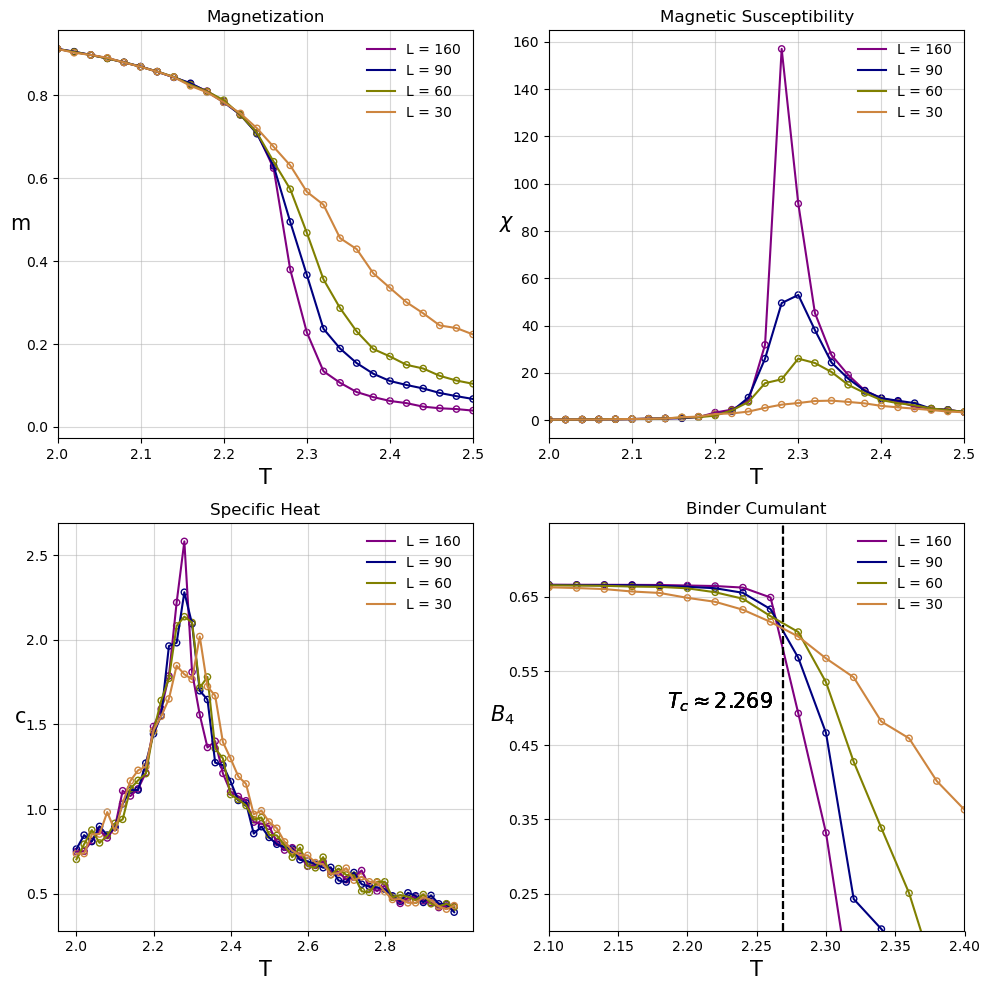

In [500]:
# All 4 plots in 1... for fun!
fig, axs = plt.subplots(2,2,figsize=(10,10))
# Magnetization
for i in range(len(M1_Array)):
    axs[0,0].set_title('Magnetization')
    axs[0,0].plot(T,Magnetization(M1_Array[i],Lengths[i]),color=Colors[i],label=f'L = {Lengths[i]}')
    axs[0,0].scatter(T,Magnetization(M1_Array[i],Lengths[i]),s=20,facecolors='none',color=Colors[i])
    axs[0,0].grid(alpha=0.5)
    axs[0,0].set_xlim(2,2.5)
    axs[0,0].set_ylabel('m',size=15,rotation='horizontal')
    axs[0,0].set_xlabel('T',size=15)
    axs[0,0].legend(framealpha=0)
# Susceptibility
    axs[0,1].plot(T,Susceptibility(M2_Array[i],M1_Array[i],Lengths[i]),color=Colors[i],label=f'L = {Lengths[i]}')
    axs[0,1].scatter(T,Susceptibility(M2_Array[i],M1_Array[i],Lengths[i]),s=20,facecolors='none',edgecolors=Colors[i])
    axs[0,1].set_xlim(2,2.5)
    axs[0,1].grid(alpha=0.5)
    axs[0,1].set_xlabel('T',size=15)
    axs[0,1].set_ylabel(r'$\chi$',size=15,rotation='horizontal')
    axs[0,1].set_title('Magnetic Susceptibility')
    axs[0,1].legend(framealpha=0)
# Specific Heat
    axs[1,0].plot(T,SpecificHeat(E2_Array[i],E1_Array[i],Lengths[i]),color=Colors[i],label=f'L = {Lengths[i]}')
    axs[1,0].scatter(T,SpecificHeat(E2_Array[i],E1_Array[i],Lengths[i]),s=20,facecolors='none',edgecolors=Colors[i])
    axs[1,0].grid(alpha=0.5)
    axs[1,0].set_xticks([2,2.2,2.4,2.6,2.8])
    axs[1,0].set_yticks([0.5,1,1.5,2,2.5])
    axs[1,0].set_title('Specific Heat')
    axs[1,0].set_ylabel('c',size=15,rotation='horizontal')
    axs[1,0].set_xlabel('T',size=15)
    axs[1,0].legend(framealpha=0)
# Binder Cumulant
    axs[1,1].axvline(Tc,color='black',linestyle='dashed',alpha=0.8)
    axs[1,1].plot(T,B4(M4_Array[i],M2_Array[i],Lengths[i]),color=Colors[i],label=f'L = {Lengths[i]}')
    axs[1,1].scatter(T,B4(M4_Array[i],M2_Array[i],Lengths[i]),s=20,facecolors='none',edgecolors=Colors[i])
    axs[1,1].set_title('Binder Cumulant')
    axs[1,1].set_yticks([0.65,0.55,0.45,0.35,0.25])
    axs[1,1].grid(alpha=0.5)
    axs[1,1].text(2.185,0.5,r'$T_c \approx 2.269$',size=15)
    axs[1,1].set_xlim(2.1,2.4)
    axs[1,1].set_ylim(0.2,0.75)
    axs[1,1].legend(framealpha=0)
    axs[1,1].set_xlabel('T',size=15)
    axs[1,1].set_ylabel(r'$B_4$',size=15,rotation='horizontal')
# Save Plot
plt.tight_layout()
plt.savefig('2DIsing.png',bbox_inches='tight',dpi=1000)
plt.show()